# 6.4: Supervised Machine Learning: Regression

# Contents

### 01. Importing data and libraries
### 02. Data check
### 03. Data prep for regression analysis
### 04. Regression analysis

## 01. Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Sulo\Desktop\Careerfoundry\Immersion\Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immo_v3.csv'), index_col = 0)

## 02. Data check

In [5]:
df.columns

Index(['state', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'totalRent', 'yearConstructed', 'hasKitchen', 'cellar', 'baseRent',
       'livingSpace', 'condition', 'petsAllowed', 'lift', 'baseRentRange',
       'typeOfFlat', 'noRooms', 'floor', 'garden', 'city/district',
       'neighbourhood', 'year', 'pricepm2', 'additionalcost', 'buildingAge',
       'Rent price category'],
      dtype='object')

In [6]:
df.shape

(79386, 26)

In [7]:
# Check the mean
df['totalRent'].mean() 

837.1894302521856

In [8]:
# Check the median
df['totalRent'].median()

700.0

In [9]:
# Check the max
df['totalRent'].max()

7150.0

In [10]:
# Check the min
df['totalRent'].min()

230.0

## 03. Data prep for regression analysis

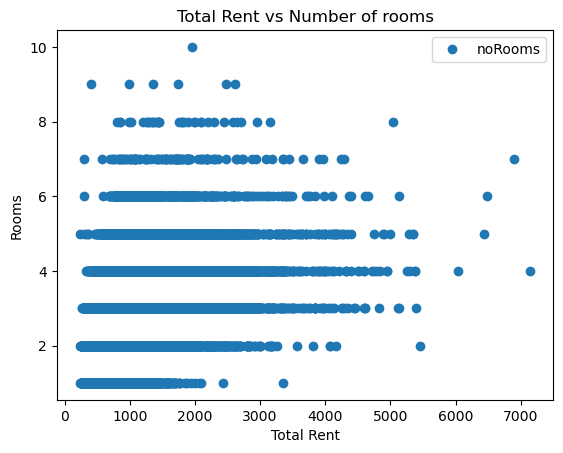

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'totalRent', y='noRooms',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Rent vs Number of rooms')  
plt.xlabel('Total Rent')  
plt.ylabel('Rooms')  
plt.show()

#### I didn't remove the higher rooms like 9 or 10 because they could be just the total rooms in a shared apartment and that's why the rent is so low.

#### My hypotheses is that the more rooms a home has the more it cost in general. 

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['totalRent'].values.reshape(-1,1)
y = df['noRooms'].values.reshape(-1,1)

In [13]:
X

array([[840.],
       [380.],
       [690.],
       ...,
       [368.],
       [670.],
       [930.]])

In [14]:
y

array([[4],
       [2],
       [2],
       ...,
       [2],
       [3],
       [4]], dtype=int64)

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 04. Regression analysis

In [16]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [17]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

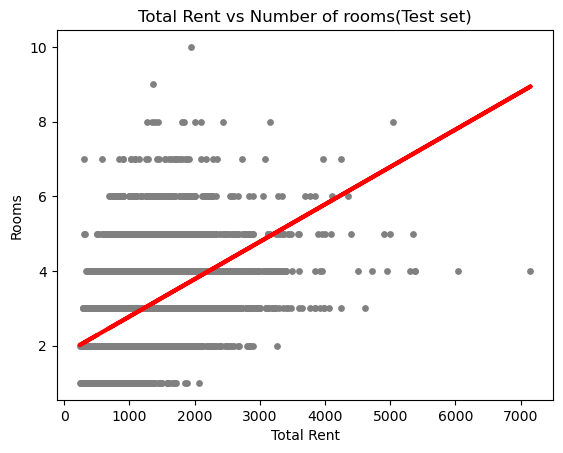

In [19]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Rent vs Number of rooms(Test set)')
plot_test.xlabel('Total Rent')
plot_test.ylabel('Rooms')
plot_test.show()

#### The way I see it is that the training model shows that there is no relation between increase in rent and rooms. It looks like it kinda evens out because the more rooms we have they don't really increase that much in total rent but the lower we are in rooms the more they increase. In the end it just stays the same

In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [21]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00100189]]
Mean squared error:  0.7398749734423209
R2 score:  0.2421084096613687


#### This shows a weak positive realtionship, and the regression line is very close to the data even though they go in different direction pretty far away from the line, meaning they cancel each other out. This model doesn't do a good job of explaining the variance of the data, all in all it's not a good model that explains the relationship.

In [22]:
y_predicted

array([[2.26686226],
       [2.1366171 ],
       [2.73273918],
       ...,
       [2.2568434 ],
       [2.23179625],
       [2.47124697]])

In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,2.266862
1,2,2.136617
2,4,2.732739
3,2,2.717711
4,3,2.276881
5,3,2.777824
6,2,2.243819
7,3,3.378956
8,3,3.343890
9,3,3.178578


#### This shows pretty much how inaccurate the predicted values are, there are sometimes very close predictions but also sometimes very innacurate predictions, rendering the predcition not very good

### Compare how the regression fits the training set

In [24]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00100189]]
Mean squared error:  0.7380791015471483
R2 score:  0.24227832097416546


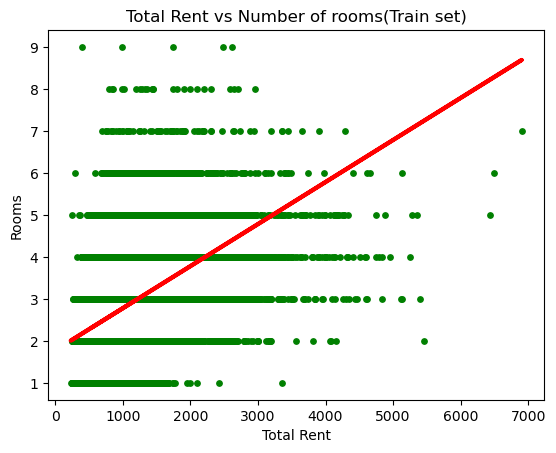

In [27]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Rent vs Number of rooms(Train set)')
plot_test.xlabel('Total Rent')
plot_test.ylabel('Rooms')
plot_test.show()

#### It only looks a little tiny bit better if you really pay attention for a while if at all, but all in all there is no difference here, showing that we have a not decent model